In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix

In [2]:
recent_grads = pd.read_csv('recent-grads.csv')
recent_grads.head()
recent_grads.tail()
recent_grads.iloc[0] #that petro money though

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

In [3]:
print(recent_grads.isnull().sum())
recent_grads.describe()

Rank                    0
Major_code              0
Major                   0
Total                   1
Men                     1
Women                   1
Major_category          0
ShareWomen              1
Sample_size             0
Employed                0
Full_time               0
Part_time               0
Full_time_year_round    0
Unemployed              0
Unemployment_rate       0
Median                  0
P25th                   0
P75th                   0
College_jobs            0
Non_college_jobs        0
Low_wage_jobs           0
dtype: int64


,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [4]:
raw_data_count = recent_grads.shape[0]
recent_grads.dropna(inplace=True)
recent_grads.isnull().sum().sum() #good

0

In [5]:
clean_data_count = recent_grads.shape[0]
print(clean_data_count, raw_data_count) #we dropped 1 row

172 173


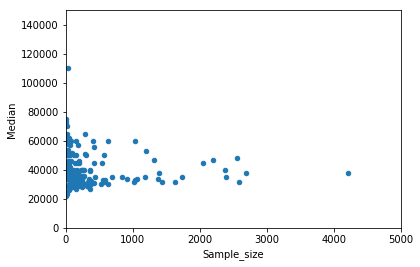

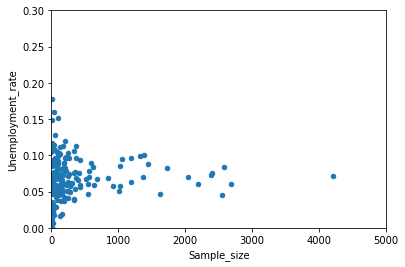

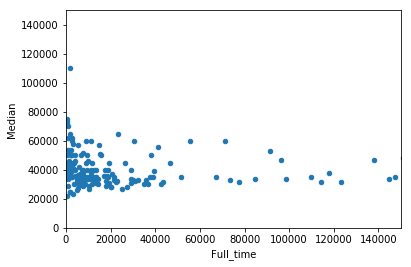

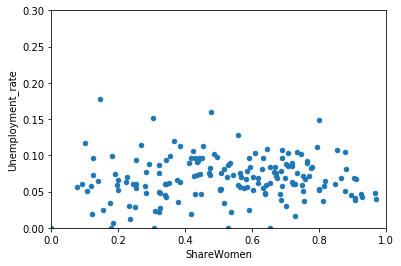

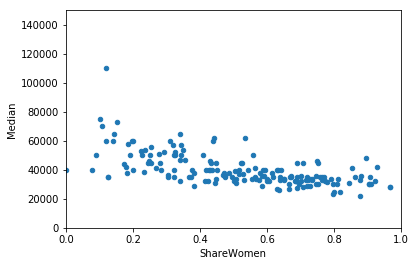

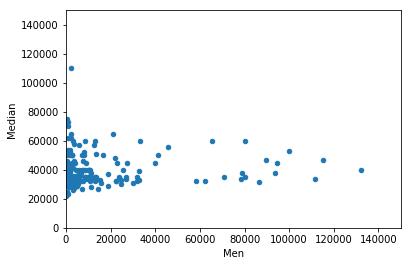

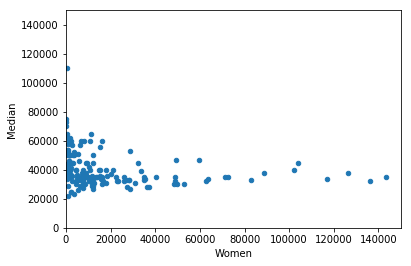

In [6]:
#we can graph 2 columns now due to dropna()
#similar set sizes
#recent_grads.columns

#turn on any of these plots to see the relationships

def plot_gen(df,X,Y,xlimit,ylimit,type_):
    df.plot(x=X,y=Y,kind=type_,xlim=xlimit,ylim=ylimit)

#turn on any of these plots to see the relationships
plot_gen(recent_grads, 'Sample_size', 'Median',(0,5000),(0,150000),'scatter')
plot_gen(recent_grads, 'Sample_size', 'Unemployment_rate',(0,5000),(0,0.3),'scatter')
plot_gen(recent_grads, 'Full_time', 'Median',(0,150000),(0,150000),'scatter')  
plot_gen(recent_grads, 'ShareWomen', 'Unemployment_rate',(0,1),(0,0.3),'scatter')
plot_gen(recent_grads, 'ShareWomen', 'Median',(0,1),(0,150000),'scatter')
plot_gen(recent_grads, 'Men', 'Median',(0,150000),(0,150000),'scatter')  
plot_gen(recent_grads, 'Women', 'Median',(0,150000),(0,150000),'scatter')

first graph: popular major doesn't make more money generally. Petro-money with the outlier of petro eng, low sample size and high income.

2nd graph: Majors with a lot of enrollment seem to have an average unemployment rate. This indicates that for the most part, the supply of work-force is meeting the general market demands (although we don't know if most of the majors with high enrollment are actually doing something related to the major).

3rd graph: No major indication of whether the part-time workers generally generate less income than the fulltime employees (possibly due to the supply of full-time workers).

4th and below: Women-dominated majors don't seem to be less employable than male-dominated majors. Although one can argue that women dominated majors look to take a slight consistent dip compared to women-minority majors.

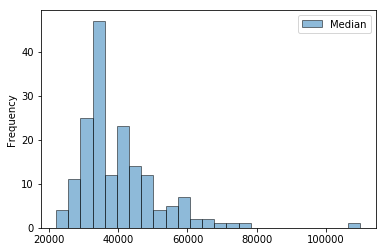

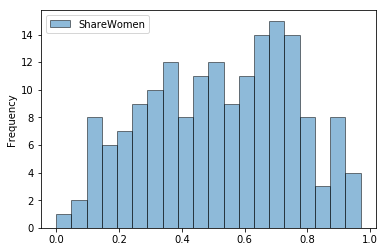

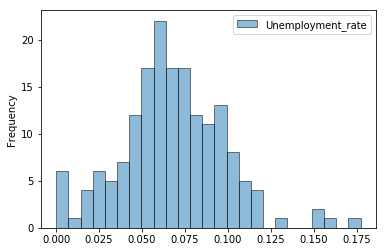

In [28]:
#histograms, Series.plot(). Single parameter.
#Let's look at the distribution for each of these important parameters: sharewomen, median, and unemployment

def hist_gen(df,col,bin_):
    df[col].plot.hist(bins=bin_,label=col,legend=col,alpha=0.5,ec="black") #edgecolor black
    plt.show()

hist_gen(recent_grads,"Median",25)
hist_gen(recent_grads,"ShareWomen",20)
hist_gen(recent_grads,"Unemployment_rate",25)



/Library/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  after removing the cwd from sys.path.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1c7ac5c0>,
      dtype=object)

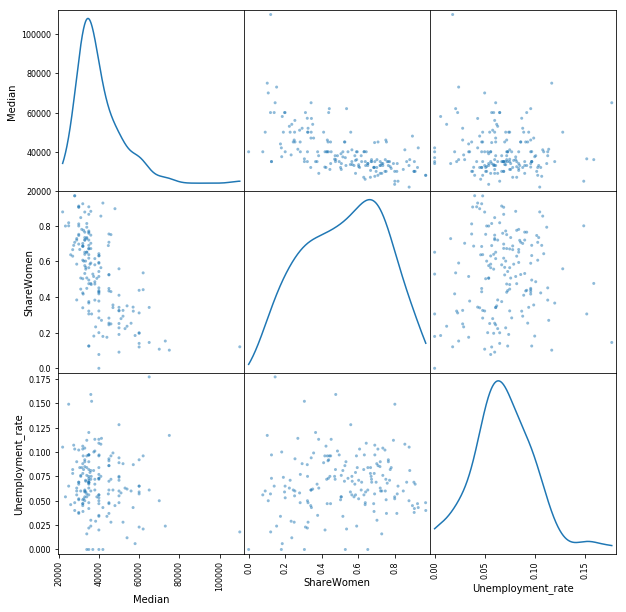

In [40]:
#df with colunms input
recent_grads["Unemployment_rate"] = recent_grads["Unemployment_rate"].round(3) #to prevent excessive decimals
#print(recent_grads["Unemployment_rate"].value_counts())
scatter_matrix(recent_grads[['Median','ShareWomen','Unemployment_rate']],diagonal='kde',figsize=(10,10))

In [42]:
#let's look at the majors in which women are the dominant
sort = recent_grads.sort_values(by='ShareWomen',ascending=False)
lower_bound = sort[['Major','Median','Total','ShareWomen','Unemployment_rate']].tail(20)
upper_bound = sort[['Major','Median','Total','ShareWomen','Unemployment_rate']].head(20)
print(lower_bound,upper_bound)

                                               Major  Median    Total  \
65            MISCELLANEOUS ENGINEERING TECHNOLOGIES   40000   8804.0   
10                              COMPUTER ENGINEERING   60000  41542.0   
9                             ELECTRICAL ENGINEERING   60000  81527.0   
28                         MISCELLANEOUS ENGINEERING   50000   9133.0   
14         ENGINEERING MECHANICS PHYSICS AND SCIENCE   58000   4321.0   
81   COMPUTER ADMINISTRATION MANAGEMENT AND SECURITY   37500   8066.0   
52                  MATHEMATICS AND COMPUTER SCIENCE   42000    609.0   
50             ENGINEERING AND INDUSTRIAL MANAGEMENT   44000   2906.0   
2                          METALLURGICAL ENGINEERING   73000    856.0   
5                                NUCLEAR ENGINEERING   65000   2573.0   
11                             AEROSPACE ENGINEERING   60000  15058.0   
111                                         FORESTRY   35000   3607.0   
106         TRANSPORTATION SCIENCES AND TECHNOLOGIE

Unsurprisingly, most of the engineering majors lack women. Women tend to major in social sciences and education related majors more.

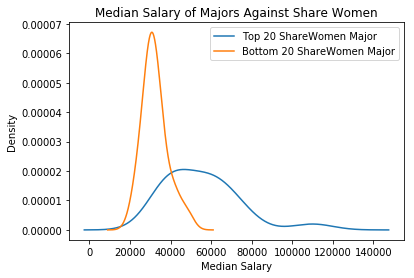

In [51]:
sort.Median.tail(20).plot.kde()
sort.Median.head(20).plot.kde()
plt.title("Median Salary of Majors Against Share Women")
plt.xlabel("Median Salary")
plt.legend(["Top 20 ShareWomen Major","Bottom 20 ShareWomen Major"])


Text(0,0.5,'Median Salary')

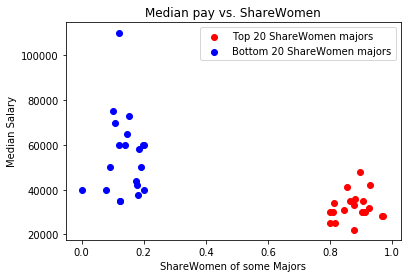

In [52]:
plt.scatter(upper_bound['ShareWomen'],upper_bound['Median'],c='r')
plt.scatter(lower_bound['ShareWomen'],lower_bound['Median'],c='b')
plt.legend(['Top 20 ShareWomen majors','Bottom 20 ShareWomen majors'])
plt.title("Median pay vs. ShareWomen")
plt.xlabel('ShareWomen of some Majors')
plt.ylabel('Median Salary')

Text(0,0.5,'Median Salary')

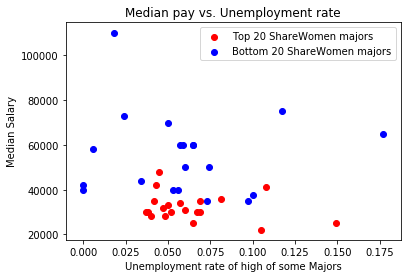

In [53]:
#Question: Does lower pay majors influenced by the lack of employment for women?
plt.scatter(upper_bound['Unemployment_rate'],upper_bound['Median'],c='r')

plt.scatter(lower_bound['Unemployment_rate'],lower_bound['Median'],c='b')
plt.legend(['Top 20 ShareWomen majors','Bottom 20 ShareWomen majors'])
plt.title("Median pay vs. Unemployment rate")
plt.xlabel('Unemployment rate of high of some Majors')
plt.ylabel('Median Salary')

it seems that there is a correlation between consistent low pay, and that major
being dominant with women. However, it may not be a causation, as majors that 
deals with social services, educations are mostly women. This may be capped by
state/federal salary in those fields. Engineers and tech are areas being staffed by men,
which generally has more demands for expertise as their production values tend to be "relatively scalable in the market".

The general strategy for women who'd like to statistically be favored in the workforce compared to her peer would be to pick one of the engineering majors that has a low employment.

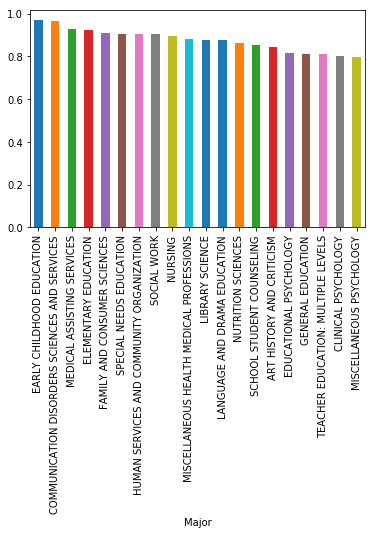

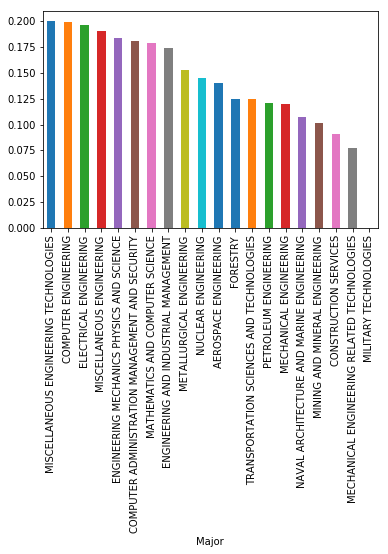

In [58]:
#to conclude this explorative visualization with our findings,
#we'll plot the bar plots of our ShareWomen for the top and bottom majors with the most/least share of women

upper_bound[:20].plot.bar(x='Major',y='ShareWomen',legend=False)
lower_bound[:20].plot.bar(x='Major',y='ShareWomen',legend=False)

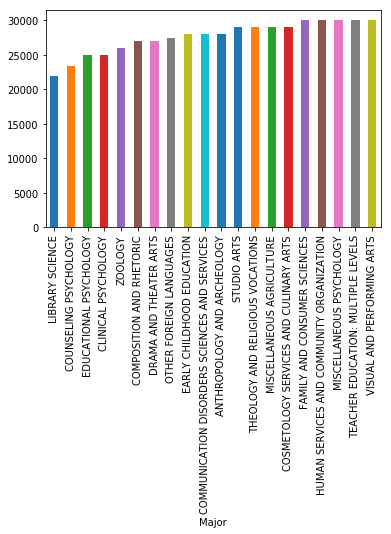

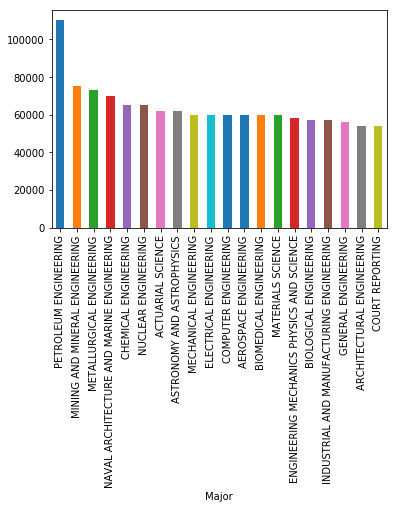

In [59]:
#and the jobs with the best median pay, as well as the least
recent_grads.sort_values(by='Median')[:20].plot.bar(x='Major',y='Median',legend=False)
recent_grads[:20].plot.bar(x='Major',y='Median',legend=False)